### Задание

#### 1. Преобразуйте данные:  
- Проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости.
- Закодируйте категориальные переменные числовыми значениями по необходимости.

In [34]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [35]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [37]:
# Удалим строки, содержащие пропуски
data = df.dropna()
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [39]:
indications = data[['nationality', 'height', 'weight', 'sport']]
indications.head()

,nationality,height,weight,sport
0,ESP,1.72,64.0,athletics
1,KOR,1.68,56.0,fencing
2,CAN,1.98,79.0,athletics
3,MDA,1.83,80.0,taekwondo
4,NZL,1.81,71.0,cycling


In [40]:
# Преобразуем категориальные признаки
X = pd.get_dummies(indications, columns=['nationality', 'sport'])
X.head()

,height,weight,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
le.fit(data['sex'])

LabelEncoder()

In [43]:
y = pd.Series(data=le.transform(data['sex']))

#### 2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Выполним стандартизацию признаков
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [46]:
# Обучаем модель
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [47]:
model.score(X_train, y_train)

0.8446926087957632

In [48]:
model.score(X_test, y_test)

0.822744014732965

In [49]:
# Прогнозные значения
predictions = model.predict_proba(X_test)
predictions[:10]

array([[0.04266817, 0.95733183],
       [0.0322169 , 0.9677831 ],
       [0.78084468, 0.21915532],
       [0.00500067, 0.99499933],
       [0.04233703, 0.95766297],
       [0.81782074, 0.18217926],
       [0.07415637, 0.92584363],
       [0.71273731, 0.28726269],
       [0.00186537, 0.99813463],
       [0.00301324, 0.99698676]])

#### 3. Постройте ROC-кривую с помощью функции sklearn.metrics.roc_curve.

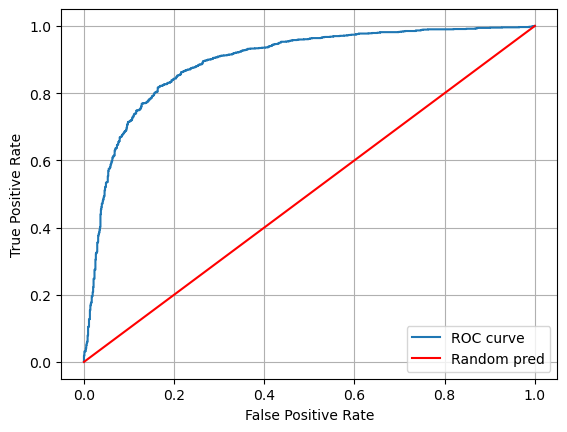

In [50]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

plt.plot(fpr, tpr, label='ROC curve')
plt.plot(np.linspace(0,1), np.linspace(0,1), color='r', label='Random pred')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()

plt.show()

#### 4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [51]:
roc_auc_score(y_test, predictions[:, 1])

0.8925326263994964

In [52]:
auc(fpr, tpr)

0.8925326263994964

#### 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [53]:
def calculate_tpr_fpr(predictions, true_labels):
    thresholds = np.linspace(0, 1, 50)
    tpr = []
    fpr = []
    
    for threshold in thresholds:

        y_pred = np.where(predictions >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (true_labels == 0))
        tp = np.sum((y_pred == 1) & (true_labels == 1))

        fn = np.sum((y_pred == 0) & (true_labels == 1))
        tn = np.sum((y_pred == 0) & (true_labels == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    
    return [tpr, fpr]

In [54]:
tpr_calc, fpr_calc = calculate_tpr_fpr(predictions[:, 1], y_test)
print('TPR:', tpr_calc[:5])
print('FPR:', fpr_calc[:5])

TPR: [1.0, 0.9941077441077442, 0.98989898989899, 0.9848484848484849, 0.9814814814814815]
FPR: [1.0, 0.8892276422764228, 0.7997967479674797, 0.7317073170731707, 0.6808943089430894]


#### 6. Постройте ROC-кривую с помощью вычисленных в п.5 метрик: объедините графики из п.3 и п.6 в один. Сравните, сделайте вывод.

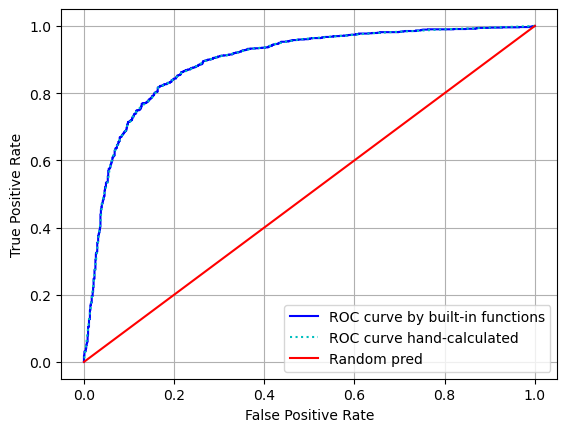

In [55]:
plt.plot(fpr, tpr, color='b', label='ROC curve by built-in functions')
plt.plot(fpr_calc, tpr_calc, color='c', linestyle='dotted', label='ROC curve hand-calculated')
plt.plot(np.linspace(0,1), np.linspace(0,1), color='r', label='Random pred')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()

plt.show()

Видим, что ROC-кривая, построенная на основании значений метрик, найденных с использованием встроенной функций, совпадает с ROC-кривой, построенной на основании значений, подсчитанных "вручную".

#### 7. Постройте график Precision-Recall, используя метрики, посчитанные в п.5.

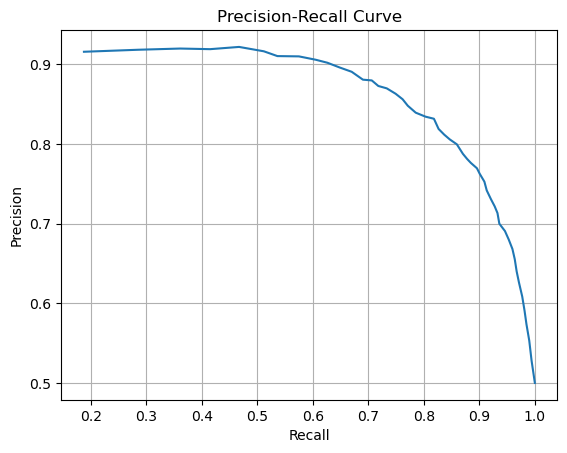

In [60]:
recall = tpr_calc
precision = list(map(lambda x, y: x / (x + y), tpr_calc, fpr_calc))

plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

#### 8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п.5.

In [57]:
def calculate_roc_auc(tpr, fpr):
    # Сортируем массивы TPR и FPR по возрастанию значений FPR
    sorted_indices = sorted(range(len(fpr)), key=lambda k: fpr[k])
    sorted_tpr = [tpr[i] for i in sorted_indices]
    sorted_fpr = [fpr[i] for i in sorted_indices]

    # Вычисляем площадь под ROC-кривой
    auc = 0
    n = len(sorted_fpr)
    for i in range(1, n):
        auc += (sorted_fpr[i] - sorted_fpr[i-1]) * \
        (sorted_tpr[i] + sorted_tpr[i-1]) / 2

    return auc

In [59]:
roc_auc = calculate_roc_auc(tpr_calc, fpr_calc)
print("Сalculated ROC-AUC:", roc_auc)

Сalculated ROC-AUC: 0.8924744566258795


#### 9. Сформулируйте выводы по проделанной работе.

Исходя из полученных графиков, можно сделать вывод о качестве модели. Если `ROC-кривая` находится близко к верхнему левому углу графика, это указывает на высокую эффективность модели. Чем ближе кривая к диагонали, тем ниже её качество. Точность модели можно оценить по площади под `ROC-кривой` (`AUC-ROC`). Если метрики указывают на высокую точность и полноту, а площадь под `ROC-кривой` близка к 1, то можно сказать, что модель хорошо обучена и имеет высокое качество.

`ROC-кривая` не может проходить ниже диагонали. Диагональ представляет случайную классификацию, где модель не имеет предсказательной способности. Если `ROC-кривая` проходит ниже диагонали, это означает, что модель работает хуже, чем случайная классификация, и её предсказания можно было бы улучшить случайным выбором классов.